## Procesamiento del Lenguaje Natural (Natural Language Processing)

El procesamiento del lenguaje natural (NLP) es un subcampo de la inteligencia artificial que se utiliza para ayudar a las computadoras a comprender el lenguaje humano natural. La mayoría de las técnicas de NLP se basan en el aprendizaje automático para obtener significado de los lenguajes humanos. Cuando se ha proporcionado texto, la computadora utiliza algoritmos para extraer el significado asociado con cada oración y recopilar datos esenciales de ellos. El NLP se manifiesta de diferentes formas en muchas disciplinas bajo varios alias, incluidos  análisis textual, minería de texto, lingüística computacional, entre otros.

### Objetivo: Desarrollar un Modelo PREDICTIVO usando Machine Learning

* ¿Qué vamos a predecir? R: El evento a predecir es un evento binario, que puede verse como "exito" o "fracaso".
* Es análogo a cuando queremos predecir si alguien va a pagar un préstamo dada su información histórica.
* Otros ejemplos análogos es predecir el tono o sentimiento de una reseña (satisfacción, enojo, indiferencia), o si un componente va a fallar en un determinado período de tiempo
* En este caso, sin embargo, la información no está "tan estructurada", ya que mucha de ella es lenguaje natural. 

In [1]:
# pip install -U scikit-learn

In [2]:
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

In [3]:
df = pd.read_csv('smsspam.tsv', sep = '\t') #separado por tabs

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


* Queremos una regla o 'mapeo' : $h(X) \rightarrow Y$, donde $Y = 1$ si el mensaje es spam, $Y=0$ si no es spam (ham) y $X$ representa nuestras variables predictoras

In [5]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [6]:
df.isnull().sum() #contar nulos de cada columna

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
len(df)

5572

In [8]:
#checar cuántas categorías tengo en mi variable respuesta:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [9]:
df['label'].nunique()

2

In [10]:
#nuestra variable respuesta (Y) es binaria (1=spam, 0=ham)
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [11]:
df['label'].value_counts(normalize=True)*100

label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64

## Intentemos hacer un modelo de Machine Learning para predecir si un mail es spam o no basándonos sólo en las variables length y punct

In [12]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [13]:
df['punct'].describe()

count    5572.000000
mean        4.177495
std         4.623919
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       133.000000
Name: punct, dtype: float64

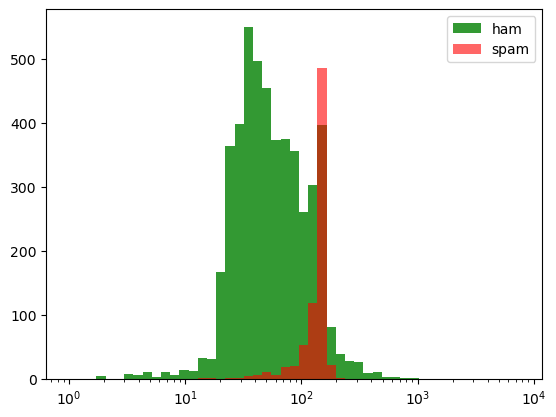

In [14]:
%matplotlib inline
plt.xscale('log') #escala logaritmo base 10.
bins = 1.2**(np.arange(0,50))
plt.hist(df[df['label']== 'ham']['length'], color = 'g', bins=bins, alpha = 0.8)
plt.hist(df[df['label']== 'spam']['length'], color = 'r', bins=bins, alpha = 0.6)
plt.legend(('ham', 'spam'))
plt.show()

In [15]:
# muy probablemente 'length' no basta para separar bien a los correo spam de los buenos.

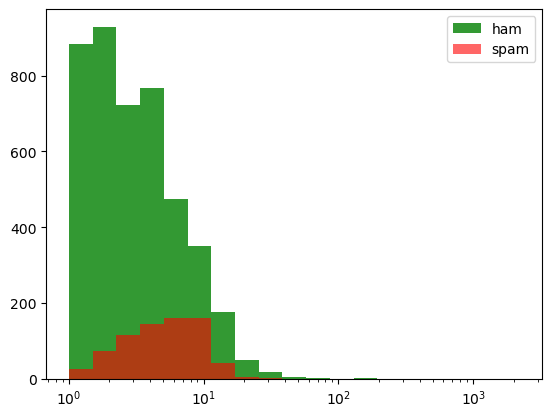

In [16]:
%matplotlib inline
plt.xscale('log')
bins = 1.5**(np.arange(0,20))
plt.hist(df[df['label']== 'ham']['punct'], color = 'g', bins=bins, alpha = 0.8)
plt.hist(df[df['label']== 'spam']['punct'], color = 'r', bins=bins, alpha = 0.6)
plt.legend(('ham', 'spam'))
plt.show()


In [17]:
# la variable 'punct' seguramente no separe bien a los mensajes spam de los buenos ('ham')

In [18]:
#Usaremos X para las predictoras (predictors, features, or explanatory variables)
# y será nuestra variable target (o label, o response variable)
X = df[['length', 'punct']]
y = df['label']

In [19]:
X

,length,punct
0,111,9
1,29,6
2,155,6
3,49,6
4,61,2
...,...,...
5567,160,8
5568,36,1
5569,57,7
5570,125,1


In [20]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

## Imagen train test, explicación

#### Un aspecto fundamental del Machine Learning bien hecho: queremos  modelos que GENERALICEN, no que sólo memoricen

<img src="train_test.png" alt="Alt text" style="width: 600px;"/>

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)

(3733, 2)
(1839, 2)


In [22]:
X_train # las variables predictoras como input para ENTRENAR el modelo

,length,punct
3235,19,3
945,221,4
5319,28,1
5528,49,1
247,30,0
...,...,...
3772,81,3
5191,22,2
5226,45,8
5390,26,0


In [23]:
X_test  # las variables predictoras como input para EVALUAR el desempeño del modelo

,length,punct
3245,147,14
944,116,1
1044,102,3
2484,45,0
812,112,4
...,...,...
4944,95,4
3313,54,2
3652,44,4
14,35,2


In [24]:
y_test

3245    ham
944     ham
1044    ham
2484    ham
812     ham
       ... 
4944    ham
3313    ham
3652    ham
14      ham
4758    ham
Name: label, Length: 1839, dtype: object

## Cuando queremos predecir una variable binaria (o incluso de más de 2 categorías), ¿qué métricas son adecuadas?

<img src="matriz_confusion.png" alt="Alt text" style="width: 700px;"/>

## Métricas para un clasificador binario

1. **Precision**: De todos los que dijimos que son positivos (denomidador), cuáles sí son positivos (numerador). 

$$
    \mbox{Precision} = \frac{VP}{VP + FP}
$$

2. **Recall** De todos los unos verdaderos o que hay en la base (denominador), cuáles sí dijimos que son unos (numerador). Dicho de otra forma, *Recall* considera todos los valores que sí son realmente positivos. 

$$
    \mbox{Recall} = \frac{VP}{VP + FN}
$$

3. **Accuracy** De todas las observaciones (denominador), cuáles predicciones son correctas (tanto unos y ceros) (numerador)

$$
    \mbox{Accuracy} = \frac{VP+VN}{VP + FN + FP+VN}
$$


4. **F1_Score** Surge para Intentar Resolver el Trade-off entre Precision y Recall

$$
    \mbox{F1 score} = \frac{VP}{VP + ((FP+FN)/2)}
$$

o **F1_Score** = $2\frac{precision*recall}{precision +recall}$

# Naïve Bayes classifier (A.K.A "Idiot Bayes"):

Un clasificador probabilístico que asume independencia condicional es [naïve Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes).

In [25]:
# Dos eventos A y B son independientes si P(A|B) = P(A)
# Si P(A|C) = P(A|B,C) --> A y B SON CONDICIONALMENTE INDEPENDIENTES DADO C
# Una vez que conocemos C, el conocer B no me dice NADA NUEVO / no aporta info nueva acerca de A, en términos probabilísticos

### $PROB(spam | length, punct).$ Si P() es 'alta', entonces el modelos va a predecir 'spam', de lo contrario 'ham'.

In [26]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB() #sólo estoy especificando el modelo.
nb_model.fit(X_train, y_train) #Aquí es donde se da el entrenamiento del modelo.

MultinomialNB()

In [27]:
from sklearn import metrics
predicciones = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test, predicciones))

[[1583   10]
 [ 246    0]]


In [28]:
dfcm = pd.DataFrame(metrics.confusion_matrix(y_test, predicciones), index = ['ham', 'spam'],
                   columns = ['ham_pred','spam_pred'])
dfcm

,ham_pred,spam_pred
ham,1583,10
spam,246,0


In [29]:
y_test.value_counts()

label
ham     1593
spam     246
Name: count, dtype: int64

In [30]:
rec = 0/246
prec = 0/10
acc = 1583/(1583+10+246)
print(rec, prec, acc)

0.0 0.0 0.8607939097335509


In [31]:
rec_ham =  1583/1593
rec_ham

0.9937225360954175

In [32]:
print(metrics.accuracy_score(y_test, predicciones))

0.8607939097335509


In [33]:
#en este caso, accuracy no nos sirve casi de nada, porque la distribución en nuestro dataset es justamente de 
# 87% ham (0's o casos negativos) y 13% de spam (1's o casos positivos)

In [34]:
print(metrics.classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1593
        spam       0.00      0.00      0.00       246

    accuracy                           0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.75      0.86      0.80      1839



In [35]:
0.99*1593/1839 + 0*246/1839

0.8575693311582382

In [36]:
# downsampling, upsampling, SMOTE (synthetic minority oversampling technique), busca mejores predictores y/o modelos más robustos

### No estamos aprovechando la información contenida en el TEXTO del mensaje.

In [37]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


# Feature Extraction:

### Idea : transformar el texto a una estructura de datos que nos permita trabajar con los modelos de ML

## Imaginemos que sólo tenemos estos 2 documentos (y que estos definen un vocabulario), y queremos construir un arreglo con todas las palabras que lo componen

## Posteriormente, caracterizaremos a cada documento mediante un vector

In [38]:
# 1.txt:

# This is a story about cats
# our feline pets
# Cats are furry animals

In [39]:
vocab = {}
i=1

with open('1.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]= i
        i+=1
        
print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12}


In [40]:
with open ('2.txt') as f:
    x = f.read().lower().split()

for word in x:
    if word in vocab:
        continue
    else:
        vocab[word]= i
        i+=1
        
print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'furry': 11, 'animals': 12, 'surfing': 13, 'catching': 14, 'waves': 15, 'fun': 16, 'popular': 17, 'water': 18, 'sport': 19}


In [41]:
vocab['cats']

6

## Ahora: transformar la información de forma tal que cada columna sea una palabra de nuestro vocabulario, y el valor sea la frecuencia

In [42]:
# iniciamos los vectores en cero
vec1 = ['1.txt'] + [0]*len(vocab)
vec2 = ['2.txt'] + [0]*len(vocab)
vec1

['1.txt', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [43]:
#vamos a contar el número de veces que aparece c/ palabra en el texto 1

with open('1.txt') as f:
    x = f.read().lower().split() # aquí estamos 'tokenizando', i.e. diviendo el documento en palabras.

for word in x:
    vec1[vocab[word]]+=1
    

In [44]:
# 1.txt:

# This is a story about cats
# our feline pets
# Cats are furry animals

In [45]:
x

['this',
 'is',
 'a',
 'story',
 'about',
 'cats',
 'our',
 'feline',
 'pets',
 'cats',
 'are',
 'furry',
 'animals']

In [46]:
vec1

['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

In [47]:
with open('2.txt') as f:
    x = f.read().lower().split() # aquí estamos 'tokenizando', i.e. diviendo el documento en palabras.

for word in x:
    vec2[vocab[word]]+=1

In [48]:
print(f'{vec1}\n{vec2}')  # --> document term matrix 

['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
['2.txt', 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1]


## Mapeamos las frecuencias de cada palabra en vec1 y vec2 (porque tenemos 2 documentos)

<img src="tdm_ejemplo.png" alt="Alt text" style="width: 400px;"/>

## El enfoque anterior se conoce como "Bag of words".
1. Podemos caracterizar un documento mediante el número de veces que aparece una palabra en él
2. Para hacer comparables documentos de diferente tamaño, podemos usar frecuencias relativas (porcentaje que cada palabra representa del total)
3. Pero hay palabras puede aparecer en la mayoría de documentos.
4. Para solucionar lo anterior > enfoque *term frequency inverse document frequency* o [**tf-idf**](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

## Idea general tf-idf

1. Term frequency **(tf)**: dar MÁS peso a palabras que aparecen más veces en un texto o documento
2. Inverse document frequency **(idf)**: se da más peso según las veces que la palabra aparece en el corpus. Como es **INVERSE** document frequency, se da más peso a palabras "raras" (que aparecen poco) y menos peso a palabras comunes.
3. En lugar de tener conteos absolutos o relativos en nuestra matriz de predictoras, tendremos la métrica tf-idf.


<img src="termfreq.png" alt="Alt text" style="width: 600px;"/>

<img src="inversedocfreq.png" alt="Alt text" style="width: 400px;"/>

## Otros puntos importantes


### En procesamiento de texto, a menudo se eliminan las "Stop Words" - palabras que aparecen mucho y no son informativas, como preposiciones, conjunciones y artículos.
### A menudo también se lleva a cabo el "stemming" -llevar una palabra a su forma 'raíz'.i.e. 'focos' -> 'foco' y otras acciones un poco más complejas para caracterizar una palabra y tener más información de ella.

In [49]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


## Aplicando vectorización tf-idf

In [50]:
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [51]:
#vamos a construir nuestra document term matrix
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # aquí es donde se construye la document term matrix
X_train_tfidf.shape

#data leakage

(3733, 7082)

In [52]:
#llegamos a una document-term matrix donde la métrica es el tf*idf

<img src="tfidftable.png" alt="Alt text" style="width: 500px;"/>

In [53]:
#IMPORTANTE: en la matriz de la celda anterior, el término de la esquina inferior derecha debe decir tfidf(pm, mens n)

## Pipeline()

`Pipeline` es una herramienta para encapsular una secuencia de pasos de procesamiento de datos y modelado en un solo objeto. Al usar un `Pipeline`, podemos automatizar y simplificar el flujo de trabajo de transformar datos y aplicar un modelo. Esto es  útil en tareas de ML donde se deben ejecutar múltiples etapas de procesamiento (como extracción de características, normalización y clasificación) en un orden específico.

El objeto `Pipeline` toma una **lista de tuplas** como entrada, donde cada tupla representa un paso en la secuencia. Cada tupla contiene dos elementos:
1. Un **string** que nombra el paso (es arbitrario y se usa para fines de identificación).
2. Un objeto **estimador** o **transformador** que realiza el procesamiento o modelado real.

In [54]:
from sklearn.pipeline import Pipeline
clasificador = Pipeline([('tfidf', TfidfVectorizer()),
                        ('model', MultinomialNB())])
clasificador.fit(X_train, y_train) #pasando los datos de entrenamiento por el pipeline

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', MultinomialNB())])

En nuestro código anterior, el `Pipeline` está compuesto por dos pasos:

- **`('tfidf', TfidfVectorizer())`**: Este primer paso utiliza `TfidfVectorizer` para transformar los datos de texto en una matriz de características TF-IDF, una estadística numérica que refleja la **importancia de una palabra para un documento en una colección o corpus**.
  
- **`('model', MultinomialNB())`**: El segundo paso implica el uso de `MultinomialNB`, un clasificador Naive Bayes multinomial, para realizar la clasificación basada en las características generadas por `TfidfVectorizer`.
  
El `Pipeline` simplifica el código automatizando el proceso de aplicar secuencialmente estas transformaciones y el clasificador. Cuando llamamos a `clasificador.fit(X_train, y_train)`, ejecuta los siguientes pasos en orden:

1. El `TfidfVectorizer` transforma los datos de entrenamiento `X_train` en una matriz TF-IDF.
2. El clasificador `MultinomialNB` es entrenado con los datos transformados y las etiquetas `y_train`.

In [55]:
predicciones = clasificador.predict(X_test)
print(metrics.confusion_matrix(y_test, predicciones))

[[1593    0]
 [  70  176]]


In [56]:
dfcm = pd.DataFrame(metrics.confusion_matrix(y_test, predicciones), index = ['ham', 'spam'], columns = ['ham_pred','spam_pred'])
dfcm

,ham_pred,spam_pred
ham,1593,0
spam,70,176


In [57]:
print(metrics.classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       1.00      0.72      0.83       246

    accuracy                           0.96      1839
   macro avg       0.98      0.86      0.91      1839
weighted avg       0.96      0.96      0.96      1839



In [58]:
# ejemplos n-grams

#estimado| inversionista| le| tengo| una| propuesta|....   #gram o 1-gram
#estimado inversionista | le tengo | una propuesta|.... # bi-gram   2 palabras. 
#....    -> n-gram


In [59]:
y.value_counts(normalize=True)

label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

In [68]:
#Clase desbalanceada: Complement Naive Bayes
from sklearn.naive_bayes import ComplementNB 

comp_text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                         ('modelo', ComplementNB())])

comp_text_clf.fit(X_train, y_train)
pred = comp_text_clf.predict(X_test)

dfcm = pd.DataFrame(metrics.confusion_matrix(y_test, pred), index = ['ham', 'spam'], columns = ['ham_pred','spam_pred'])
print(dfcm, '\n')
print(metrics.classification_report(y_test, pred))


      ham_pred  spam_pred
ham       1575         18
spam        22        224 

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1593
        spam       0.93      0.91      0.92       246

    accuracy                           0.98      1839
   macro avg       0.96      0.95      0.95      1839
weighted avg       0.98      0.98      0.98      1839



## Explicación Naive Bayes Complementario

La principal diferencia entre el Naive Bayes Complementario (Complement NB) y el Naive Bayes Multinomial (MultinomialNB) radica en cómo manejan el problema de clases  desbalanceadas y su enfoque  para lidiar con la estimación de probabilidades para la clasificación.

1. **Naive Bayes Multinomial (MNB):**
   - MNB se basa en la distribución multinomial y es adecuado para clasificación con variables predictoras discretas (por ejemplo, conteos de palabras o frecuencias en clasificación de texto).
   - Estima directamente la probabilidad de cada clase ($Y$) basándose en la frecuencia de las características que aparecen en muestras pertenecientes a esa clase.
   - MNB tiende a funcionar bien en problemas de clasificación de texto pero puede tener dificultades con conjuntos de datos desbalanceados donde algunas clases están subrepresentadas.

2. **Naive Bayes Complementario (CNB):**
   - CNB es una adaptación del Naive Bayes Multinomial tradicional diseñado para desempeñarse mejor en conjuntos de datos desbalanceados.
   - En lugar de estimar las probabilidades de las clases directamente a partir de las frecuencias de las características dentro de la clase, CNB calcula los pesos utilizando el complemento de cada clase. Este enfoque reduce el sesgo hacia las clases más frecuentes considerando la ausencia (o presencia en otras clases) de características. 
   - CNB ofrece una mejora para manejar conjuntos de datos desbalanceados ajustando el enfoque de estimación de probabilidades para ser menos sesgado hacia las clases más comunes y por tanto tiende a superar a MNB en conjuntos de datos donde algunas clases están significativamente menos representadas que otras.

### Veamos un ejemplo:

Supongamos tenemos un problema de clasificación de textos donde queremos clasificar mensajes como: "Spam" y "No Spam". Tenemos el siguiente conjunto de datos simplificado:

- **No Spam**: "Pizza gratis con cada pedido"
- **Spam**: "Gana una pizza gratis ahora"
- **Spam**: "Obtén tu cupón de pizza gratis"

En Naive Bayes Multinomial (MNB) tradicional, calculamos la probabilidad de cada palabra dada la clase y usamos estas probabilidades para clasificar nuevos mensajes. Si una palabra aparece más frecuentemente en una clase, aumentará la probabilidad de esa clase.

### El 'problema' con MNB

MNB puede sesgarse hacia la clase más frecuente si hay clases desbalanceadas o si ciertas palabras que son importantes para la clasificación aparecen en ambas clases. En el ejemplo, "gratis" y "pizza" aparecen en ambas clases, pero con un conjunto de datos pequeño (o desbalanceado), el modelo podría volverse sesgado.

### Enfoque de Complement Naive Bayes (CNB)

CNB aborda esto enfocándose en el **COMPLEMENTO** de cada clase. Para clasificar "Spam", CNB observa cómo se distribuyen las palabras en la clase **"No Spam"** (la clase complementaria) y viceversa. CNB hace los siguiente:


1. **Calcular Características de la Clase Complementaria**: En lugar de calcular directamente la frecuencia de "gratis" y "pizza" en "Spam", CNB calcula su frecuencia en "No Spam". Encuentra que la palabra "pedido" es una característica distintiva de "No Spam".

2. **Cálculo de Peso**:  Calcula el peso para cada característica basado en su ausencia (o presencia reducida) en la clase complementaria. Dado que "pedido" **NO** está presente en los mensajes de "Spam" pero **SÍ** en "No Spam", le da a "pedido" un mayor peso al determinar "No Spam".

3. **Reducir el Sesgo**: Al considerar cómo se distribuyen las características en la clase complementaria, CNB puede reducir el sesgo hacia las clases más dominantes. En nuestro ejemplo, aunque "gratis" y "pizza" aparecen en ambas clases, la presencia de "pedido" indica fuertemente "No Spam", ayudando a CNB a clasificar mensajes más precisamente a pesar de la superposición.

4. **Clasificar un Nuevo Mensaje**: Si recibimos un nuevo mensaje, "Haz tu pedido ahora y obtén tu pizza", CNB utiliza los pesos calculados de las clases complementarias. A pesar de que "pizza" es común en "Spam", la presencia de "pedido" y los pesos calculados sugieren "No Spam".

In [ ]:
### Resultados Complement Naive Bayes

<img src="resultados_complement_NB.png" alt="Alt text" style="width: 400px;"/>

### ¿Qué pasaría ahora si usáramos un modelo más sofisticado?

In [66]:
#Vamos a implementar una máquina de soporte vectorial (SVM) (Más adelante explicaremos los detalles)
from sklearn.svm import LinearSVC

In [67]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', LinearSVC())])
text_clf.fit(X_train, y_train)

/opt/anaconda3/envs/diplomado_cdd/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [69]:
pred = text_clf.predict(X_test)
print(metrics.confusion_matrix(y_test, pred), '\n')
print(metrics.classification_report(y_test, pred))

[[1586    7]
 [  12  234]] 

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

    accuracy                           0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [70]:
# Idea de UN ASPECTO clave de las SVMs.

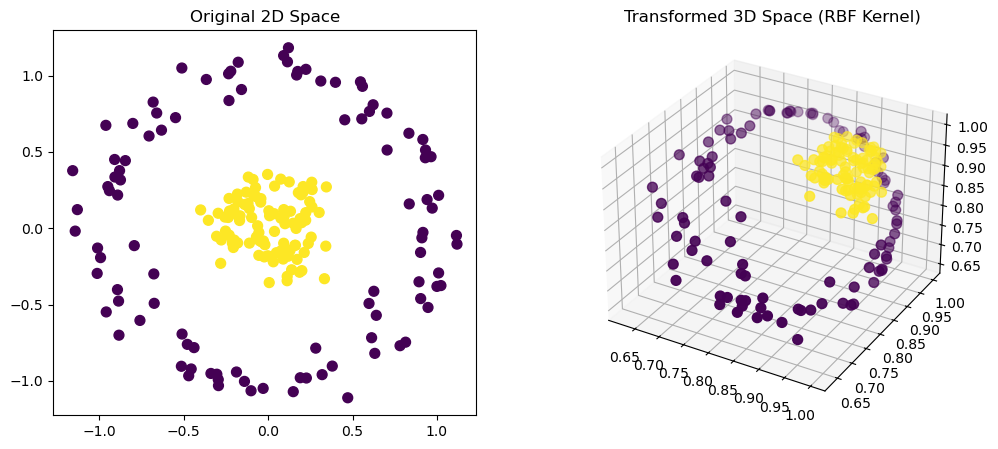

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# Datos que no son linealmente separables
X, y = make_circles(n_samples=200, noise=0.1, factor=0.2, random_state=42)

# Train an SVM classifier with the RBF kernel   (kERNEL TRICK)
svm = SVC(kernel='rbf', C=1, gamma=1/10)
svm.fit(X, y)

# Define el kernel de transformación
def rbf_transform(X, gamma):
    sq_dist = np.sum(X ** 2, axis=1).reshape(-1, 1) + np.sum(X ** 2, axis=1) - 2 * X.dot(X.T)
    return np.exp(-gamma * sq_dist)

# Transformar el dataset usando kernel RBF
X_transformed = rbf_transform(X, gamma=svm.gamma)

# Crear gráfico
fig = plt.figure(figsize=(12, 5))

# 2D plot
ax1 = fig.add_subplot(121)
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
ax1.set_title("Original 2D Space")

# 3D plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y, cmap='viridis', s=50)
ax2.set_title("Transformed 3D Space (RBF Kernel)")

plt.show()

[otra visualización SVM](https://www.youtube.com/watch?v=3liCbRZPrZA)

### Modelos supervisados vs no supervisados

<img src="superv_vs_nosuper.png" alt="Alt text" style="width: 1000px;"/>

In [ ]:
# X distribuye Ber(p) --> Var(X)= p(1-p)